In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
df= pd.read_csv('performance.csv')

In [20]:
df.describe()

,Delivery Charges
count,180.000000
mean,145.555556
std,37.105048
min,0.000000
25%,150.000000
50%,150.000000
75%,150.000000
max,180.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Province          180 non-null    object
 1   City              180 non-null    object
 2   Area              180 non-null    object
 3   Company           180 non-null    object
 4   Status            180 non-null    object
 5   Delivery Time     180 non-null    object
 6   Delivery Charges  180 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 10.0+ KB


In [22]:
df['Province']= df['Province'].astype('category')
df['City']= df['City'].astype('category')
df['Area']= df['Area'].astype('category')
df['Company']= df['Company'].astype('category')
df['Status']= df['Status'].astype('category')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Province          180 non-null    category
 1   City              180 non-null    category
 2   Area              180 non-null    category
 3   Company           180 non-null    category
 4   Status            180 non-null    category
 5   Delivery Time     180 non-null    object  
 6   Delivery Charges  180 non-null    int64   
dtypes: category(5), int64(1), object(1)
memory usage: 7.4+ KB


In [24]:
import re
Delivery_time= df['Delivery Time']
li= list()
for i in range(Delivery_time.size):
    res= re.search(r'\d*', Delivery_time[i])
    li.append(int(res.group()))   

In [25]:
df['Delivery Time']= li

In [26]:
df.head(5)

,Province,City,Area,Company,Status,Delivery Time,Delivery Charges
0,AJK,Muzzaffagarh,Main,BLUEX,Delivered,12,150
1,AJK,Muzafarabad,Main,TRAX,Delivered,3,150
2,AJK,Muzafarabad,Main,TRAX,Delivered,4,150
3,AJK,Muzzaffagarh,Main,TRAX,Returned Recieved,10,130
4,Balochistan,Dera Murad Jamal,Main,BLUEX,Delivered,6,150


In [27]:
Unique_provinces= df['Province'].unique()
Unique_provinces

[AJK, Balochistan, Capital, KPK, Punjab, Sindh]
Categories (6, object): [AJK, Balochistan, Capital, KPK, Punjab, Sindh]

In [28]:
Unique_cities= df['City'].unique()
Unique_cities

[Muzzaffagarh, Muzafarabad, Dera Murad Jamal, Hub Chowki, Quetta, ..., Larkana, Makli Thatta, Sadiq Abad, Sanghar, Tando Allahyar]
Length: 78
Categories (78, object): [Muzzaffagarh, Muzafarabad, Dera Murad Jamal, Hub Chowki, ..., Makli Thatta, Sadiq Abad, Sanghar, Tando Allahyar]

In [29]:
group_by_province= df.groupby('Province')

In [30]:
group_by_status= df.groupby('Status')

In [32]:
group_by_area= df.groupby('Area')

In [33]:
dfdelivered= group_by_status.get_group('Delivered')

In [34]:
dfreturned= group_by_status.get_group('Returned Recieved')

In [35]:
group_by_company= df.groupby('Company')

In [36]:
dfbluex= group_by_company.get_group('BLUEX')

In [37]:
dftrax= group_by_company.get_group('TRAX')

In [38]:
group_by_bluexspecificstatus=dfbluex.groupby('Status')


In [39]:
dfbluexd=group_by_bluexspecificstatus.get_group('Delivered')
dfbluexr=group_by_bluexspecificstatus.get_group('Returned Recieved')

In [40]:
group_by_traxspecificstatus=dftrax.groupby('Status')

In [41]:
dftraxd=group_by_traxspecificstatus.get_group('Delivered')
dftraxr=group_by_traxspecificstatus.get_group('Returned Recieved')

In [42]:
status_delivered= group_by_status.get_group('Delivered')
status_delivered.head()

,Province,City,Area,Company,Status,Delivery Time,Delivery Charges
0,AJK,Muzzaffagarh,Main,BLUEX,Delivered,12,150
1,AJK,Muzafarabad,Main,TRAX,Delivered,3,150
2,AJK,Muzafarabad,Main,TRAX,Delivered,4,150
4,Balochistan,Dera Murad Jamal,Main,BLUEX,Delivered,6,150
5,Balochistan,Hub Chowki,Main,BLUEX,Delivered,7,150


In [43]:
group_by_cities=df.groupby('City')

In [44]:
df2= df.groupby(['Company','Status']).size()

In [45]:
df2= df2.unstack()

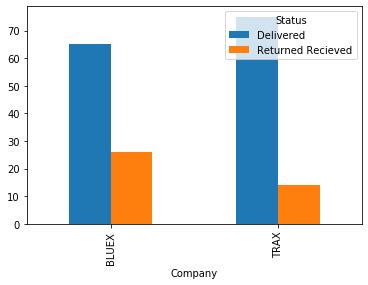

In [46]:
df2.plot(kind='bar')

In [35]:
def visualize_group(df, column1, column2):
    df= df.groupby([column1,column2]).size()
    df= df.unstack()
    df.plot(kind='bar')

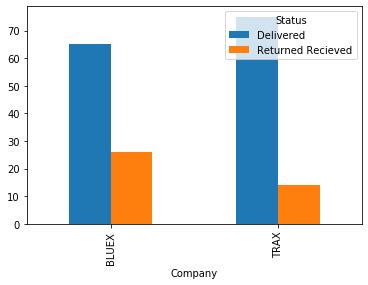

In [20]:
visualize_group(df, 'Company', 'Status')

In [47]:
dfAJK= group_by_province.get_group('AJK')
dfBalochistan= group_by_province.get_group('Balochistan')
dfCapital= group_by_province.get_group('Capital')
dfKPK= group_by_province.get_group('KPK')
dfPunjab= group_by_province.get_group('Punjab')
dfSindh= group_by_province.get_group('Sindh')

Province AJK


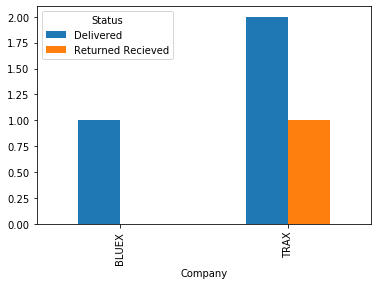

In [38]:
print('Province AJK')
visualize_group(dfAJK, 'Company', 'Status')

Province Balochistan


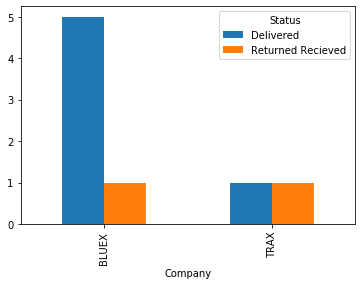

In [39]:
print('Province Balochistan')
visualize_group(dfBalochistan, 'Company', 'Status')

Province Capital


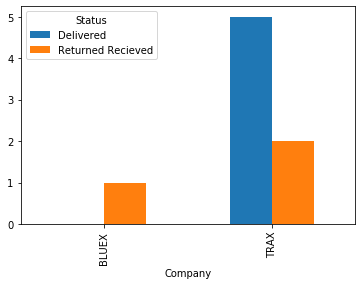

In [40]:
print('Province Capital')
visualize_group(dfCapital, 'Company', 'Status')

Province KPK


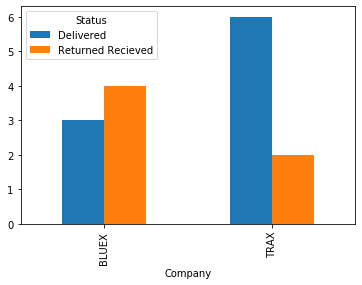

In [41]:
print('Province KPK')
visualize_group(dfKPK, 'Company', 'Status')

Province Punjab


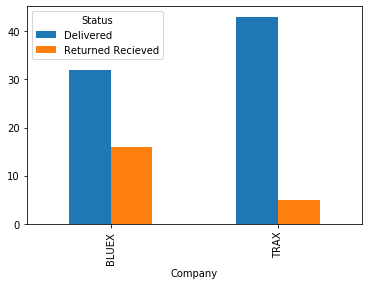

In [42]:
print('Province Punjab')
visualize_group(dfPunjab, 'Company', 'Status')

Province Sindh


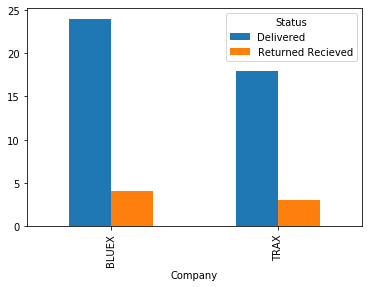

In [88]:
print('Province Sindh')
visualize_group(dfSindh, 'Company', 'Status')

In [ ]:
#df
#dfbluex
#dftrax
#dfdelivered
#dfreturned
#dfbluexd
#dfbluexr
#dftraxd
#dftraxr

In [48]:
dfbluex[['Delivery Time', 'Delivery Charges']].agg([sum, min, max,np.mean])

,Delivery Time,Delivery Charges
sum,680.000000,14430.000000
min,1.000000,150.000000
max,16.000000,180.000000
mean,7.472527,158.571429


In [49]:
dftrax[['Delivery Time', 'Delivery Charges']].agg([sum, min, max,np.mean])

,Delivery Time,Delivery Charges
sum,442.000000,11770.000000
min,1.000000,0.000000
max,14.000000,150.000000
mean,4.966292,132.247191


In [50]:
group_by_area[['Delivery Time', 'Delivery Charges']].agg([sum, min, max,np.mean])

Delivery Time                   Delivery Charges                      
                  sum min max      mean              sum  min  max        mean
Area                                                                          
Main              972   1  16  6.037267            23170    0  180  143.913043
Tehsil             83   3  14  7.545455             1770  150  180  160.909091
Village            67   3  15  8.375000             1260  150  180  157.500000

In [51]:
group_by_area_bluex=dfbluex.groupby('Area')
group_by_area_trax=dftrax.groupby('Area')

In [52]:
group_by_area_bluex[['Delivery Time', 'Delivery Charges']].agg([min, max,np.mean])

Delivery Time               Delivery Charges                 
                  min max      mean              min  max        mean
Area                                                                 
Main                1  16  7.177215              150  180  157.594937
Tehsil              6  14  9.666667              150  180  170.000000
Village             3  15  9.166667              150  180  160.000000

In [53]:
group_by_area_trax[['Delivery Time', 'Delivery Charges']].agg([min, max,np.mean])

Delivery Time               Delivery Charges                 
                  min max      mean              min  max        mean
Area                                                                 
Main                1  14  4.939024                0  150  130.731707
Tehsil              3   7  5.000000              150  150  150.000000
Village             3   9  6.000000              150  150  150.000000

In [54]:
group_by_area_bluex[['Delivery Charges']].agg([min, max,np.mean])

Delivery Charges                 
                     min  max        mean
Area                                     
Main                 150  180  157.594937
Tehsil               150  180  170.000000
Village              150  180  160.000000

In [55]:
group_by_area_trax[['Delivery Charges']].agg([min, max,np.mean])

Delivery Charges                 
                     min  max        mean
Area                                     
Main                   0  150  130.731707
Tehsil               150  150  150.000000
Village              150  150  150.000000

In [120]:
def visualize_city(df, city_name, column1, column2):
    unique_cities= df['City'].unique()
    group_by_city= df.groupby('City')
    try:
        dfcity_selected= group_by_city.get_group(city_name)
        dfcity_selected= dfcity_selected.groupby([column1,column2]).size()
        dfcity_selected= dfcity_selected.unstack()
        return True
    except Exception as e:
        return False
unique_cities= df['City'].unique() #it will generate the list of all unique cities
bluex_cities=list() #it will only contain cities in which Bluex is delivering items
trax_cities=list()  #it will only contain cities in which trax is delivering items
for city in unique_cities: #looping through the unique cities list
    if visualize_city(dfbluex, city, 'Delivery Time', 'Delivery Charges'): #Muzzaffagarh return True
        bluex_cities.append(city) #Muzzaffagarh will be added in bluex_cities list
    elif visualize_city(dftrax, city, 'Delivery Time', 'Delivery Charges'): #Muzafarabad return True
        trax_cities.append(city) #Muzafarabad will be added in trax_cities
#print(bluex_cities, sep=',')
#print(trax_cities, sep=',')
len(trax_cities)

24

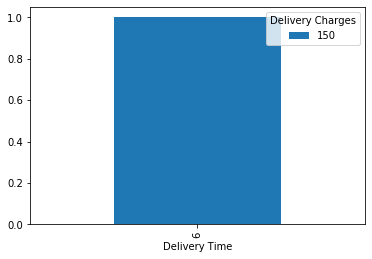

In [63]:
def visualize_city(df, city_name, column1, column2):
    unique_cities= df['City'].unique()
    group_by_city= df.groupby('City')
    try:
        dfcity_selected= group_by_city.get_group(city_name)
        dfcity_selected= dfcity_selected.groupby([column1,column2]).size()
        dfcity_selected= dfcity_selected.unstack()
        dfcity_selected.plot(kind='bar')
    except Exception as e:
        print(e," not found...\nplease enter correct name...")


visualize_city(dftrax, 'Samundri', 'Delivery Time', 'Delivery Charges')

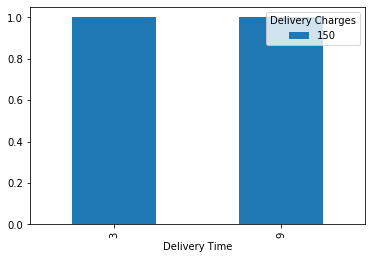

In [93]:
def visualize_area(df, area_name, column1, column2):
    unique_area= df['Area'].unique()
    group_by_area= df.groupby('Area')
    try:
        dfarea_selected= group_by_area.get_group(area_name)
        dfarea_selected= dfarea_selected.groupby([column1,column2]).size()
        dfarea_selected= dfarea_selected.unstack()
        dfarea_selected.plot(kind='bar')
    except Exception as e:
        print(e," not found...\nplease enter correct area name...")
visualize_area(dftraxd, 'Village', 'Delivery Time', 'Delivery Charges')

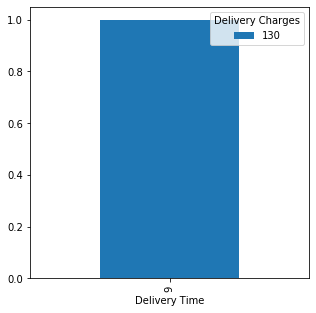

In [118]:
def visualize_province(df, province_name, column1, column2):
    unique_province= df['Province'].unique()
    group_by_province= df.groupby('Province')
    try:
        dfprovince_selected= group_by_province.get_group(province_name)
        dfprovince_selected= dfprovince_selected.groupby([column1,column2]).size()
        dfprovince_selected= dfprovince_selected.unstack()
        dfprovince_selected.plot(kind='bar', figsize=(5,5))
    except Exception as e:
        print(e," not found...\nplease enter correct province name...")
visualize_province(dftraxr, 'Balochistan', 'Delivery Time', 'Delivery Charges')